# In This Notebook:

- [Pandas Data Structures: DataFrame and Series](#Pandas-Data-Structures:-DataFrame-and-Series)
    - [Pandas Overview](#Pandas-Overview)
    - [DataFrame and Series Objects](#DataFrame-and-Series-Objects)
    - [Working with Data by Index and Columns](#Working-with-Data-by-Index-and-Column)
    - [Removing Data](#Removing-Data)
    - [Multi-Level Indexing](#Multi-Level-Indexing)
    - [Common Series Methods](#Common-Series-Methods)
    - [Filtering and Sorting Data](#Filtering-and-Sorting-Data)
- [Getting Data](#Getting-Data)
    - [From Files](#From-Files)
    - [From User Generated Data](#From-User-Generated-Data)
    - [Webscraping](#Webscraping)
    - [Writing and Saving Data](#Writing-and-Saving-Data)
- [Cleaning Data](#Cleaning-Data)
    - [Handling Nulls](#Handling-Nulls)
    - [Using Where Functions](#Using-Where-Functions)
    - [String Matching and Cleaning](#String-Matching-and-Cleaning)
- [Data Wrangling and Manipulation](#Data-Wrangling-and-Manipulation)
    - [Applying Functions and Transformations](#Applying-Functions-and-Transformations)
    - [Joining/Merging Data Sets](#Joining/Merging-Data-Sets)
    - [Aggregating Data: Groupby and Pivot Tables](#Aggregating-Data:-Groupby-and-Pivot-Tables)
- [Handling Dates and Times](#Handling-Dates-and-Times)

# Pandas Data Structures: DataFrame and Series

### Pandas Overview

The pandas library provides a wealth of tools and data structures to facilitate reading, cleaning, manipulating, processing, and analyzing data, and is largely responsible for the popularity of python as a data analysis platform.  Since becoming an open source project in 2010, pandas has matured and now integrates well with many other python packages such as matplotlib for data visualization, scikit-learn for machine learning, statsmodels for statistical analysis, and many others.  

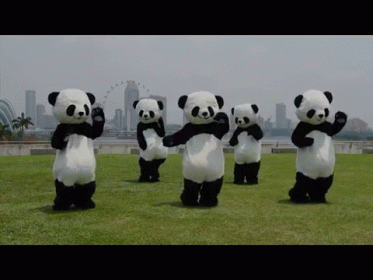

This notebook covers the main functionality of the pandas library.  It is certainly not an exhaustive treatment of all the features of the library, but highlights some of the commonly used aspects.  See the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) for a full reference.  

Pandas is built on the numpy library and incorporates many of numpy's functionality.  However, it's still useful to import both libraries since numpy will provide some extra functionality to help run computations and process numerical data.  Hence, every data analysis notebook I ever use will start with the following two imports.

In [1]:
import pandas as pd
import numpy as np

### DataFrame and Series Objects

The two main pandas data structures are DataFrame (for tabular data) and Series (single column/vector of data).  

In [171]:
#Read in and view the first 5 rows of a DataFrame
#This is some fake Physical Training (PT) Test scores including scores (0-100) for Pushups, Situps, and 2Mile run
df = pd.read_csv('Data/ptScores.csv')
df.head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000
4,DW,M,O6,27,91,75,82,82.670000


A DataFrame is basically a collection of Series objects.  We can access a single column with `df["col_name"]`, or if the column name has no spaces we can also access it with `df.col_name`.

In [62]:
#Each column of the DataFrame is a Series
ser = df.age
ser.head()

0    18
1    30
2    36
3    48
4    27
Name: age, dtype: int64

In [63]:
print(type(df),type(ser))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


As we can see, the DataFrame is essentially a tabular, spreadsheet-like data structure.  Unlike numpy arrays which must be a single data type, DataFrames can hold multiple different data types.  We can see the data types of each column with the info() method.

In [64]:
#View basic info of DataFrame, including data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
SoldierInitials    200 non-null object
gender             200 non-null object
rank               200 non-null object
age                200 non-null int64
PU                 200 non-null int64
SU                 200 non-null int64
MI2                200 non-null int64
Average            200 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 12.6+ KB


We see that there are two numerical types for float and int data.  There are also other pandas data types for boolean or datetime data.  Everything else, including string data, is classified as "object" data type.

It's also helpful to get a quick summary of any numerical columns with the describe() method.

In [65]:
#Get quick summary of numerical fields
df.describe()

,age,PU,SU,MI2,Average
count,200.000000,200.0000,200.000000,200.000000,200.000000
mean,33.785000,75.2900,69.675000,78.545000,74.503333
std,9.535376,9.4585,8.135126,5.136134,4.649690
min,18.000000,46.0000,50.000000,67.000000,63.000000
25%,25.000000,68.0000,65.000000,74.000000,70.670000
50%,34.000000,75.0000,70.000000,79.000000,75.000000
75%,42.000000,82.0000,75.000000,82.000000,78.000000
max,50.000000,98.0000,92.000000,91.000000,86.330000


### Working with Data by Index and Column

You may have noticed that DataFrames labels all rows and columns.  Row labels are the DataFrame index while column labels are the DataFrame columns.

Understanding how to effectively use the Index and Columns is essential to being able to view, explore, interact with, and manipulate your data. Here are a few commonly used techniques for using index and column that may be helpful.

Quick note on terminology.  While *index* refers to the row labels and *columns* refers to the column labels, both index and column are pandas *Index* objects.  Hence, sometimes the term "index" refers specifically to the row index values, and sometimes the term "index" can refer generally to either index or column.  For example, the function `df.reindex()` can re-assign the labels for either the rows or column depending on the arguments you pass in.   

In [66]:
df.index

RangeIndex(start=0, stop=200, step=1)

In [67]:
df.columns

Index(['SoldierInitials', 'gender', 'rank', 'age', 'PU', 'SU', 'MI2',
       'Average'],
      dtype='object')

We can quickly view various subsets of a DataFrame with head(), tail() or sample() methods.

In [68]:
#View first n rows
df.head(3)

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000


In [69]:
#View last n rows
df.tail(4)

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
196,BF,F,E9,45,90,62,77,76.33
197,OH,M,O6,26,67,60,73,66.67
198,GE,M,O5,22,67,77,78,74.00
199,IG,M,O5,38,87,81,91,86.33


In [70]:
#View random sample
df.sample(n=6)

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
31,IG,M,E2,42,78,68,85,77.00
140,RF,M,O3,25,74,69,76,73.00
171,TA,F,E3,29,80,80,72,77.33
83,CB,F,E7,46,91,81,80,84.00
74,SB,F,E1,33,79,57,79,71.67
64,HL,M,O3,48,71,66,77,71.33


We can also specify a set or range of rows to display by referencing the index of each row, either using `df.loc[]` to locate rows by index name, or using `df.iloc[]` to locate rows by index numbers.

In [71]:
#View specific range of rows
df.iloc[5:10] #View rows number 5, 6, 7, 8, and 9

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
5,DP,M,E5,26,78,70,74,74.00
6,JO,F,O4,46,61,61,88,70.00
7,JF,M,O3,36,91,66,70,75.67
8,JQ,M,E1,35,87,70,75,77.33
9,KE,F,E8,19,68,70,83,73.67


In [72]:
#Leave off start index to default to start of df
df.iloc[:6] #rows 0 to 5, same as df.head(6)

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000
4,DW,M,O6,27,91,75,82,82.670000
5,DP,M,E5,26,78,70,74,74.000000


In [73]:
#Leave off end index to go through end of df
df.iloc[len(df)-4:] #Same as df.tail(4)

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
196,BF,F,E9,45,90,62,77,76.33
197,OH,M,O6,26,67,60,73,66.67
198,GE,M,O5,22,67,77,78,74.00
199,IG,M,O5,38,87,81,91,86.33


In [74]:
#We can also specify a single row, in which case iloc returns a Series object with the data of that row
df.iloc[0]

SoldierInitials         LB
gender                   M
rank                    E8
age                     18
PU                      71
SU                      71
MI2                     79
Average            73.6667
Name: 0, dtype: object

In [75]:
#We can feed in any collection of row numbers
df.iloc[[0,10,50,100]]

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
10,DF,M,O2,28,76,74,84,78.000000
50,HI,M,E4,37,53,68,84,68.330000
100,LP,M,E1,38,63,70,79,70.670000


In [76]:
#Unfortunately we can't feed in a combination of multiple different ranges
#df.iloc[[0:4,10:15]] #This won't work

#One trick to view multiple ranges is with the np.r_ function to get a custom range
#E.g., here's a trick I use often to view first few and last few rows of a DataFrame
df.iloc[np.r_[0:4,-4:0]]

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000
196,BF,F,E9,45,90,62,77,76.330000
197,OH,M,O6,26,67,60,73,66.670000
198,GE,M,O5,22,67,77,78,74.000000
199,IG,M,O5,38,87,81,91,86.330000


As mentioned, we can also view rows by index name with df.loc[].  However, currently the *name* of each df row is the same as the *number* of each row.

In [77]:
df.iloc[0:3]

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000


In [78]:
df.loc[0:3] #Should give similar result as df.iloc[0:3]

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000


To make the distinction between df.iloc and df.loc clearer, lets rename the index.

In [79]:
#We can get the current df index with df.index, which returns a pandas RangeIndex object
df.index

RangeIndex(start=0, stop=200, step=1)

In [80]:
#This may seem scary, but we can always convert any index range to a list
list(df.index)[:5]

[0, 1, 2, 3, 4]

In [81]:
#We can set index to new values by providing a sequence the same length as df
df.index = np.arange(200,200+len(df))
df.head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
200,LB,M,E8,18,71,71,79,73.666667
201,SW,M,E3,30,84,70,79,77.670000
202,EV,F,E3,36,97,64,77,79.330000
203,ML,F,E8,48,77,62,75,71.330000
204,DW,M,O6,27,91,75,82,82.670000


In [82]:
#Or we can set index to be a current column of the df
df.set_index('SoldierInitials')
df.head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
200,LB,M,E8,18,71,71,79,73.666667
201,SW,M,E3,30,84,70,79,77.670000
202,EV,F,E3,36,97,64,77,79.330000
203,ML,F,E8,48,77,62,75,71.330000
204,DW,M,O6,27,91,75,82,82.670000


Hmmm, the index didn't actually get changed.  What happened?  Turns out most pandas funtions only return a new value of the dataframe for the user to use or discard; they don't actually change the dataframe object in place.  Hence, it's usually needed to re-assign the updated dataframe to itself to actually update it.

In [83]:
df = df.set_index('SoldierInitials')
df.head()

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
LB,M,E8,18,71,71,79,73.666667
SW,M,E3,30,84,70,79,77.670000
EV,F,E3,36,97,64,77,79.330000
ML,F,E8,48,77,62,75,71.330000
DW,M,O6,27,91,75,82,82.670000


That did the trick.  Two points worth noting about the index:
1. Index doesn't have to be an integer.  Here it's a string, and we'll see later it can also be a datetime.  
2. The index can have a name.  This can be a useful way to keep track of what the index name refers to.  

In [84]:
#Now we can locate df rows by index name with df.loc[]
df.loc['LB']

gender           M
rank            E8
age             18
PU              71
SU              71
MI2             79
Average    73.6667
Name: LB, dtype: object

In [85]:
df.loc[['LB','EV']]

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
LB,M,E8,18,71,71,79,73.666667
EV,F,E3,36,97,64,77,79.330000


Another point about Index is that the values don't have to be unique.  We can use the value_counts() pandas method to see that several of the initial are repeated.

In [86]:
#View the 5 most repeated values in the index
df.index.value_counts().head()

TS    3
UT    3
NU    3
ML    3
SE    2
Name: SoldierInitials, dtype: int64

In [87]:
#Locating any repeated index will return all matching rows
df.loc[['NU','TS']]

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
NU,M,E3,40,56,57,79,64.00
NU,M,E3,32,77,68,75,73.33
NU,M,O4,22,68,71,80,73.00
TS,M,O3,20,74,57,77,69.33
TS,M,E1,21,71,66,72,69.67
TS,M,E7,39,72,73,68,71.00


We can also view a subset of the DataFrame columns

In [88]:
df.columns #Returns Index object, a sequence of column names

Index(['gender', 'rank', 'age', 'PU', 'SU', 'MI2', 'Average'], dtype='object')

In [89]:
#View subset of columns
df[['PU','SU','MI2']].head()

,PU,SU,MI2
SoldierInitials,,,
LB,71,71,79
SW,84,70,79
EV,97,64,77
ML,77,62,75
DW,91,75,82


In [90]:
#If we grab a single column, it will return a Series
df['Average'].head()

SoldierInitials
LB    73.666667
SW    77.670000
EV    79.330000
ML    71.330000
DW    82.670000
Name: Average, dtype: float64

In [91]:
#We can grab a single column but remain a DataFrame by feeding in a list of a single element
df[['Average']].head()

,Average
SoldierInitials,
LB,73.666667
SW,77.670000
EV,79.330000
ML,71.330000
DW,82.670000


We can also use df.iloc[] or df.loc[] to re-assign values in a dataframe row

In [92]:
df.head()

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
LB,M,E8,18,71,71,79,73.666667
SW,M,E3,30,84,70,79,77.670000
EV,F,E3,36,97,64,77,79.330000
ML,F,E8,48,77,62,75,71.330000
DW,M,O6,27,91,75,82,82.670000


In [93]:
#Must feed in a sequence that matches the number of columns
df.iloc[0] = ['M','O5',50,100,100,100,100]
df.head(3)

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
LB,M,O5,50,100,100,100,100.00
SW,M,E3,30,84,70,79,77.67
EV,F,E3,36,97,64,77,79.33


In [94]:
#Works for loc as well
df.loc['LB'] = ['M','O5',50,90,90,90,90]
df.head(3)

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
LB,M,O5,50,90,90,90,90.00
SW,M,E3,30,84,70,79,77.67
EV,F,E3,36,97,64,77,79.33


We can **add** new rows with the loc[] method.

In [175]:
#We can also feed in an index name that doesn't exist to df.loc[] and it will creat a new row
df.tail(3)

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
OH,M,O6,26,67,60,73,66.67
GE,M,O5,22,67,77,78,74.00
IG,M,O5,38,87,81,91,86.33


In [176]:
df.loc['ZZ'] = ['M','O5',50,90,90,90,90]
df.tail(3)

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
GE,M,O5,22,67,77,78,74.00
IG,M,O5,38,87,81,91,86.33
ZZ,M,O5,50,90,90,90,90.00


If you only specify a single value when adding a new row, pandas will "Broadcast" that value, i.e. repeat it enough times to fill the entire row.

In [180]:
#If you only specify a single value, pandas will "Braodcast" that value
df.loc['ZZZ'] = '5'
df.tail()

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
GE,M,O5,22,67,77,78,74
IG,M,O5,38,87,81,91,86.33
ZZ,M,O5,50,90,90,90,90
zzz,5,5,5,5,5,5,5
ZZZ,5,5,5,5,5,5,5


In [98]:
#Unfortunately we can't use iloc or loc to change a single entry in the df
df.loc['ZZ']['age'] = 100 #This wont' update the age of the ZZ entry
df.tail()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
BF,F,E9,45,90,62,77,76.33
OH,M,O6,26,67,60,73,66.67
GE,M,O5,22,67,77,78,74.00
IG,M,O5,38,87,81,91,86.33
ZZ,M,O5,50,90,90,90,90.00


In [99]:
#Pandas provides an at functionality for this purpose
#Feed in index name followed by column name
df.at['ZZ','age'] = 100
df.tail()

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
BF,F,E9,45,90,62,77,76.33
OH,M,O6,26,67,60,73,66.67
GE,M,O5,22,67,77,78,74.00
IG,M,O5,38,87,81,91,86.33
ZZ,M,O5,100,90,90,90,90.00


We can also add new Columns in the same way, either by assigning it to a vector of the correct length:

In [181]:
df['Pass'] = ['Yes']*len(df)
df.head()

,gender,rank,age,PU,SU,MI2,Average,Pass
SoldierInitials,,,,,,,,
LB,M,E8,18,71,71,79,73.6667,Yes
SW,M,E3,30,84,70,79,77.67,Yes
EV,F,E3,36,97,64,77,79.33,Yes
ML,F,E8,48,77,62,75,71.33,Yes
DW,M,O6,27,91,75,82,82.67,Yes


In [182]:
#Or we can again specify one value, and pandas will broadcast it across the entire column
df['Pass'] = 'No'
df.head()

,gender,rank,age,PU,SU,MI2,Average,Pass
SoldierInitials,,,,,,,,
LB,M,E8,18,71,71,79,73.6667,No
SW,M,E3,30,84,70,79,77.67,No
EV,F,E3,36,97,64,77,79.33,No
ML,F,E8,48,77,62,75,71.33,No
DW,M,O6,27,91,75,82,82.67,No


We can also change the column or index names with rename

In [240]:
df.rename(columns={'MI2':'2MileRun','PU':'Pushups'}).head()

,gender,rank,age,Pushups,SU,2MileRun,Average,Pass
SoldierInitials,,,,,,,,
LB,M,E8,18,71,71,79,73.6667,No
SW,M,E3,30,84,70,79,77.67,No
EV,F,E3,36,97,64,77,79.33,No
ML,F,E8,48,77,62,75,71.33,No
DW,M,O6,27,91,75,82,82.67,No


### Removing Data

We've seen how to *keep* or even rearrange a subset of columns or indices, e.g. with `df[cols_to_keep]` or `df.loc[rows_to_keep]`.  We can also specify what index values to remove.

In [82]:
#Recall current value of df
df.head()

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
LB,M,E8,18,71,71,79,73.666667
SW,M,E3,30,84,70,79,77.670000
EV,F,E3,36,97,64,77,79.330000
ML,F,E8,48,77,62,75,71.330000
DW,M,O6,27,91,75,82,82.670000


In [83]:
#Remove given entries with df.drop()
#Default is to remove entries from Index (axis=0)
df_new = df.drop(['LB','SW'])
df_new.head()

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
EV,F,E3,36,97,64,77,79.33
ML,F,E8,48,77,62,75,71.33
DW,M,O6,27,91,75,82,82.67
DP,M,E5,26,78,70,74,74.00
JO,F,O4,46,61,61,88,70.00


In [94]:
#Set axis argument to 1 to remove values from columns
df_new = df.drop(['gender','rank'],axis=1)
df_new.head()

,age,PU,SU,MI2,Average
SoldierInitials,,,,,
LB,18,71,71,79,73.666667
SW,30,84,70,79,77.670000
EV,36,97,64,77,79.330000
ML,48,77,62,75,71.330000
DW,27,91,75,82,82.670000


Instead of the confusing "axis=1" notation, we can directly specify the list of items to remove from the index or column, which can be more intuitive.  It's always great to make your code more intuitive, especially if someone else will look at your code later, such as another data analyst, or even future you!

In [98]:
df.drop(index=['LB','SW']).head()

,gender,rank,age,PU,SU,MI2,Average
SoldierInitials,,,,,,,
EV,F,E3,36,97,64,77,79.33
ML,F,E8,48,77,62,75,71.33
DW,M,O6,27,91,75,82,82.67
DP,M,E5,26,78,70,74,74.00
JO,F,O4,46,61,61,88,70.00


In [99]:
df.drop(columns=['gender','rank']).head()

,age,PU,SU,MI2,Average
SoldierInitials,,,,,
LB,18,71,71,79,73.666667
SW,30,84,70,79,77.670000
EV,36,97,64,77,79.330000
ML,48,77,62,75,71.330000
DW,27,91,75,82,82.670000


In [100]:
#We can even use this notation to drop both index and column labels
df.drop(index=['LB','SW'],columns=['gender','rank']).head()

,age,PU,SU,MI2,Average
SoldierInitials,,,,,
EV,36,97,64,77,79.33
ML,48,77,62,75,71.33
DW,27,91,75,82,82.67
DP,26,78,70,74,74.00
JO,46,61,61,88,70.00


One tricky part of the drop() method is that if we feed in a value that is not in the index, it will throw an error.

In [96]:
#This will throw an error, since 'Pass' is not in the columns
#df.drop(['gender','rank','Pass'],axis=1).head()

Another tool we can use, which helps get around this issue, is to use the difference() method of pandas Index objects.

In [97]:
#This will only keep columns that are not in the list ['gender','rank','Pass']
cols_to_keep = df.columns.difference(['gender','rank','Pass'])
#This will run just fine even though 'Pass' is not in the columns
df[cols_to_keep].head()

,Average,MI2,PU,SU,age
SoldierInitials,,,,,
LB,73.666667,79,71,71,18
SW,77.670000,79,84,70,30
EV,79.330000,77,97,64,36
ML,71.330000,75,77,62,48
DW,82.670000,82,91,75,27


Yet another method we can use to remove and narrow down data (there's always about 10 ways to do any task in python/pandas) is with the reindex() method, where we can specify the new set of indices or columns to keep.

In [102]:
#Use reindex() to specify which index or column values to keep, and the order
df.reindex(columns=['age','MI2','SU','PU']).head()

,age,MI2,SU,PU
SoldierInitials,,,,
LB,18,79,71,71
SW,30,79,70,84
EV,36,77,64,97
ML,48,75,62,77
DW,27,82,75,91


One advantage of reindex is that we can pass in values that are currently not in the index, and it will initialize a new row/column.

In [103]:
#Pass is not in the current columns, so this will initialize a new 'Pass' column, with all null values for now
df.reindex(columns=['age','MI2','SU','PU','Pass']).head()

,age,MI2,SU,PU,Pass
SoldierInitials,,,,,
LB,18,79,71,71,NaN
SW,30,79,70,84,NaN
EV,36,77,64,97,NaN
ML,48,75,62,77,NaN
DW,27,82,75,91,NaN


### Multi-Level Indexing

Pandas supports mutli-level indexing.

In [152]:
df = pd.read_csv('Data/ptScores.csv')
df.head(2)

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000


In [109]:
df_multi = df.set_index(['SoldierInitials','gender','rank'])
df_multi.head()

,,,age,PU,SU,MI2,Average
SoldierInitials,gender,rank,,,,,
LB,M,E8,18,71,71,79,73.666667
SW,M,E3,30,84,70,79,77.670000
EV,F,E3,36,97,64,77,79.330000
ML,F,E8,48,77,62,75,71.330000
DW,M,O6,27,91,75,82,82.670000


We can access rows by specifying the index values in order.

In [111]:
df_multi.loc['ML']

age  PU  SU  MI2  Average
gender rank                           
F      E8     48  77  62   75    71.33
M      O5     31  84  74   79    79.00
       E4     33  76  63   78    72.33

In [112]:
df_multi.loc['ML','M','O5']

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


,,,age,PU,SU,MI2,Average
SoldierInitials,gender,rank,,,,,
ML,M,O5,31,84,74,79,79.0


In [113]:
#We can use reset_index() to "unpack" indices back into columns
df_multi.reset_index().head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000
4,DW,M,O6,27,91,75,82,82.670000


In [114]:
#We can also drop (wipe out) the index values with reset_index(drop=True)
df_multi.reset_index(drop=True).head()

,age,PU,SU,MI2,Average
0,18,71,71,79,73.666667
1,30,84,70,79,77.670000
2,36,97,64,77,79.330000
3,48,77,62,75,71.330000
4,27,91,75,82,82.670000


### Common Series Methods

Pandas has many built-in Series methods that are useful for summarizing or evaluating the data in that column.

In [116]:
#Recall df
df.head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000
4,DW,M,O6,27,91,75,82,82.670000


In [115]:
#Compute variety of statistics of any numerical column
df.age.min(), df.age.max(), df.age.mean(), df.age.std()

(18, 50, 33.785, 9.535375816390195)

In [120]:
#Perform arithmatic on any series
(10*df.age+3).head()

0    183
1    303
2    363
3    483
4    273
Name: age, dtype: int64

In [122]:
#Compute Boolean Series wherever value satisfies some condition
(df.age<30).head()

0     True
1    False
2    False
3    False
4     True
Name: age, dtype: bool

For any string columns, we can access any standard python string methods using df.col_name.str.method().  This will typically return a new series where the string method is applied element-wise to each entry in the original series. 

In [117]:
#Get new Series with length of strings in SoldierInitials column
df.SoldierInitials.str.len().head()

0    2
1    2
2    2
3    2
4    2
Name: SoldierInitials, dtype: int64

In [118]:
#Get new Boolean Series which is True for any entries that contain an "L"
df.SoldierInitials.str.contains('L').head()

0     True
1    False
2    False
3     True
4    False
Name: SoldierInitials, dtype: bool

Some more useful Series methods

In [124]:
#Get array of unique values in any column
df['rank'].unique()

array(['E8', 'E3', 'O6', 'E5', 'O4', 'O3', 'E1', 'O2', 'E6', 'E2', 'O1',
       'E9', 'O5', 'E4', 'E7'], dtype=object)

**Warning**: Why did we run `df['rank'].unique()` instead of `df.rank.unique()`?  Turns out that rank is a DataFrame method, so when we type `df.rank`, pandas first tries to execute the rank() method (which retruns a new dataframe where each element is replaced by its ranking within that column, try it out below to see).  

In [129]:
#Get list of value counts in any Series
df['rank'].value_counts()

E1    21
O1    20
O5    17
E2    16
O3    15
O4    14
E3    13
E8    12
E6    12
E9    12
E4    11
E7    11
E5    11
O6     8
O2     7
Name: rank, dtype: int64

In [239]:
#Replace values by some mapping
gender_map = {'M':'Male','F':'Female'}
df

,gender,rank,age,PU,SU,MI2,Average,Pass
SoldierInitials,,,,,,,,
LB,M,E8,18,71,71,79,73.6667,No
SW,M,E3,30,84,70,79,77.67,No
EV,F,E3,36,97,64,77,79.33,No
ML,F,E8,48,77,62,75,71.33,No
DW,M,O6,27,91,75,82,82.67,No


### Filtering and Sorting Data

We just saw that we can evaluate Boolean Series indicating where the values of a Series satisfy some condition.  We can use this to quickly filter our DataFrames to only show data satisfying some condition, a simple but powerful technique.

In [18]:
#Recall df
df.head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000
4,DW,M,O6,27,91,75,82,82.670000


In [25]:
#Only view Soldiers under 20
df[df.age<20].head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
9,KE,F,E8,19,68,70,83,73.670000
35,NQ,M,O3,19,64,80,90,78.000000
39,PA,F,O5,18,67,69,89,75.000000
48,RH,F,O1,18,82,83,79,81.330000


In [24]:
#Only view Officers
df[df['rank'].str.startswith('O')].head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
4,DW,M,O6,27,91,75,82,82.67
6,JO,F,O4,46,61,61,88,70.00
7,JF,M,O3,36,91,66,70,75.67
10,DF,M,O2,28,76,74,84,78.00
11,MC,M,O4,49,89,75,75,79.67


To *negate* a boolean Series, we have to use the ~ symbol rather than the not keyword.

In [153]:
df[~ df['rank'].str.startswith('O')].head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000
5,DP,M,E5,26,78,70,74,74.000000


In [28]:
#We can combine multiple conditions
#E.g. see who failed at least one event (scored less than 60 points)
df[(df.PU<60) | (df.SU < 60) | (df.MI2 < 60)].head()


,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
17,WX,M,E8,47,73,52,78,67.67
25,MW,F,O1,20,56,67,83,68.67
32,XA,M,O2,32,67,52,73,64.00
43,IF,M,E5,28,79,53,82,71.33
47,NU,M,E3,40,56,57,79,64.00


As a warning on using multiple conditions, pandas may not be able to parse multiple boolean conditions if they are not contained in parentheses.  E.g., `df[df.PU<60 | df.SU < 60 | df.MI2 < 60]` will throw an error, so always good practice to include parentheses around each condition.

We can also sort our dataframe, a great way to quickly view or rearrange the data.

In [31]:
#Sort alphabetical by initials
df.sort_values(by='SoldierInitials').head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
97,AG,M,E5,46,75,71,80,75.33
60,AH,M,E4,34,89,61,84,78.00
157,AI,F,O4,23,66,63,78,69.00
78,AK,F,E4,21,85,80,74,79.67
189,AT,M,E4,43,68,65,79,70.67


In [32]:
#Sort from oldest to youngest
df.sort_values(by='age',ascending=False).head() #ascending=True is the default

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
21,KT,M,O5,50,77,73,70,73.33
184,SS,M,E9,50,82,67,74,74.33
150,LM,F,O3,50,94,80,82,85.33
169,HD,M,O4,50,89,75,77,80.33
173,CC,M,O6,50,82,75,82,79.67


In [34]:
#Do multiple sorts
df.sort_values(by=['rank','age'],ascending=[False,True]).head(10)
#This will do a primary sort on rank in descedning order, and a secondary sort on age in ascending order
#Hence, we start off with some high speed 20 yr old O6's....recall this is fake data :)

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
52,FV,F,O6,20,77,72,83,77.33
168,CM,M,O6,21,77,70,73,73.33
125,PP,M,O6,23,77,61,70,69.33
197,OH,M,O6,26,67,60,73,66.67
4,DW,M,O6,27,91,75,82,82.67
187,EM,M,O6,32,80,71,70,73.67
30,VX,M,O6,49,71,85,80,78.67
173,CC,M,O6,50,82,75,82,79.67
39,PA,F,O5,18,67,69,89,75.00
119,DX,M,O5,22,69,84,81,78.00


It's worth noting that none of the above commands actually *changed* the `df` object.

In [35]:
df.head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000
4,DW,M,O6,27,91,75,82,82.670000


To change the dataframe itself, we can either apply the update back to the object, `df = df.sort_values(..)`, or we can use the inplace argument.

In [36]:
df.sort_values(by=['rank','age'],ascending=[False,True],inplace=True)
df.head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
52,FV,F,O6,20,77,72,83,77.33
168,CM,M,O6,21,77,70,73,73.33
125,PP,M,O6,23,77,61,70,69.33
197,OH,M,O6,26,67,60,73,66.67
4,DW,M,O6,27,91,75,82,82.67


# Getting Data

### From Files

As we've seen, we can grab data from a csv file with the read_csv method.

In [130]:
df = pd.read_csv('Data/ptScores.csv')
df.head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000
4,DW,M,O6,27,91,75,82,82.670000


Pandas also has built in methods to read in data from a variety of other data formats, including excel, json, and many others.  

In [131]:
#Type TAB after pd.read to see the available read in methods
#pd.read_

### From User Generated Data

Sometimes we want to initialize a DataFrame with some existing data.  For example, maybe we ran a set of simulations, and want to load these into a DataFrame so that we can use pandas tools to wrangle and evaluate the data we collected.  

In [134]:
#Generate or simulate some data
grades = ['A','B','C','D','F']
student_IDs = np.random.randint(1,100,size=10) #10 random student ID #'s
student_grades = np.random.choice(grades,size=10) #10 random student grades

#Feed in data as a dict mapping keys to data sequences
#Keys become column names
df_grades = pd.DataFrame(data={'Student_ID':student_IDs,'Grade':student_grades})
df_grades

,Student_ID,Grade
0,7,F
1,65,B
2,78,B
3,67,D
4,24,D
5,11,F
6,26,F
7,82,A
8,59,B
9,84,C


In [138]:
#We can also fill in a 2D array
x = np.random.randn(8,3)
df_data = pd.DataFrame(data=x)
df_data

,0,1,2
0,-0.974308,-0.254938,1.397611
1,-0.419424,-0.207491,-0.556305
2,1.126889,1.062785,-0.387531
3,0.723426,-0.800607,-0.671089
4,-0.366850,1.012863,-0.966527
5,-0.855648,-1.878371,-0.782866
6,0.368251,-0.024145,-0.377491
7,-0.927041,-1.132330,-1.637617


In [139]:
#If you don't like column labels of 0, 1, and 2, can feed in column labels
df_data = pd.DataFrame(data=x,columns=['Sim1','Sim2','Sim3'])
df_data

,Sim1,Sim2,Sim3
0,-0.974308,-0.254938,1.397611
1,-0.419424,-0.207491,-0.556305
2,1.126889,1.062785,-0.387531
3,0.723426,-0.800607,-0.671089
4,-0.366850,1.012863,-0.966527
5,-0.855648,-1.878371,-0.782866
6,0.368251,-0.024145,-0.377491
7,-0.927041,-1.132330,-1.637617


### Webscraping

Python has powerful tools to search and extract data from the web.  Consider the following url, which contains the results from the 2019 Masters golf tournamnet: https://www.espn.com/golf/leaderboard?tournamentId=401056527.  How could we extract the data from that website and get it into a DataFrame to capture the results and/or do further analysis?

We can use the urllib library to read in raw data from url's.  

In [38]:
import urllib

In [39]:
#Now use the request module to request the raw html code from our url
url = 'https://www.espn.com/golf/leaderboard?tournamentId=401056527'

#Open the url, and read in the raw html code
html = str(urllib.request.urlopen(url).read())

print(html[:500]) #Print first 500 characters of html code

b'\n        <!doctype html>\n        <html lang="en">\n            <head>\n                <!-- ESPNFITT | 373dd935adfe | 3887 | 00938c7ef68d4186ae47eb17909aaeb5d78c63b0 | Fri, 05 Jun 2020 13:48:52 GMT -->\n                <script type=\'text/javascript\' >\n        ;(function(){\n            function gc(n){var r=document.cookie.match("(^|;) ?"+n+"=([^;]*)(;|$)");return r?r[2]:null}function sc(n){document.cookie=n}function smpl(n){var r=n/100;return!!r&&Math.random()<=r}var _nr=!1,_nrCookie=gc("


If, like me, you are a human and not a computer, that probably looks like a hot mess.  If we wanted, we could try to parse through the html code to try and extract the data, perhaps with some sophisticated regex pattern searching.

In [41]:
start_of_table = html.find('<table')
html[start_of_table:start_of_table+1000]

'<table cellPadding="0" cellSpacing="0" class="Table Table--align-right"><colgroup span="10" class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column Table--sorted"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/></colgroup><thead class="Table__THEAD"><tr class="Table__TR Table__even"><th title="" class="pos tl Table__TH"><a class="AnchorLink clr-gray-04" tabindex="0" data-sort-key="pos">POS</a></th><th title="" class="name tl Table__TH"><a class="AnchorLink clr-gray-04" tabindex="0" data-sort-key="name">PLAYER</a></th><th title="" class="toPar Table__TH"><a class="AnchorLink clr-gray-04" tabindex="0" data-sort-key="toPar">TO PAR</a><span class="dib arrow-icon_cont" style="width:10px;height:10px"><svg class="w-70 icon__svg" viewBox="0 0 24 24"><use xlink:href="#icon__caret__down"></use></svg

Thankfully, python has a package BeautifulSoup which helps parse through the mess that is html code.  Here's how we could use it to extract the table data.

In [42]:
from bs4 import BeautifulSoup as BS
soup = BS(html, 'html.parser')

In [43]:
#Find the table tag
tables = soup('table')
table = tables[0]
#table is now a beautiful soup Tag object
print(type(table))

<class 'bs4.element.Tag'>


We could now try and parse through and grab the contents.  For example, to get the column names, we could sift through all `<th>` tags (table header) and grab their contents (text attribute) as follows.

In [49]:
#Grab column names from all <th> (table header) tags
column_tags = table('th') #list of all <th> tags within the table tag
col_labels = []
for col in column_tags:
    col_labels.append(col.text)
df_masters = pd.DataFrame(columns=col_labels)
df_masters

,POS,PLAYER,TO PAR,R1,R2,R3,R4,TOT,EARNINGS,FEDEX PTS


In [54]:
#And then we could go through all rows (<tr> tags) and extract the data for each table entry in that row (<td> tags)
for tr in table('tr'):
    curr_row_data = []
    for td in tr('td'):
        curr_row_data.append(td.text)
    #Now add current row data to dataframe
    if (len(curr_row_data) == len(col_labels)):
        df_masters.loc[len(df_masters)] = curr_row_data

#Lets see if that worked
df_masters.head()

,POS,PLAYER,TO PAR,R1,R2,R3,R4,TOT,EARNINGS,FEDEX PTS
0,1,Tiger Woods,-13,70,68,67,70,275,"$2,070,000",600
1,T2,Dustin Johnson,-12,68,70,70,68,276,"$858,667",230
2,T2,Xander Schauffele,-12,73,65,70,68,276,"$858,667",230
3,T2,Brooks Koepka,-12,66,71,69,70,276,"$858,667",230
4,T5,Jason Day,-11,70,67,73,67,277,"$403,938",106


In [199]:
#Thankfully, for this particular task of grabbing data from html tables, pandas has built in function
df_masters = pd.read_html(url)[0]
#pd.read_html returns list of all tables.  Use [0] to grab the first table.
df_masters.head()

,POS,PLAYER,TO PAR,R1,R2,R3,R4,TOT,EARNINGS,FEDEX PTS
0,1,Tiger Woods,-13,70,68,67,70,275,"$2,070,000",600
1,T2,Dustin Johnson,-12,68,70,70,68,276,"$858,667",230
2,T2,Xander Schauffele,-12,73,65,70,68,276,"$858,667",230
3,T2,Brooks Koepka,-12,66,71,69,70,276,"$858,667",230
4,T5,Jason Day,-11,70,67,73,67,277,"$403,938",106


Of course, things may not always be that simple.  Often times the content in web pages is not simply embedded in the html code but is generated through some javascript calls, in which case this approach won't work.

In [201]:
#Can't scrape table data from this page
url2 = 'https://www.masters.com/en_US/scores/index.html'
# df_masters2 = pd.read_html(url2)[0]
# df_masters2.head()

This only scratches the surface of what you can do with webscraping in python.  Often times a website will have an API to facilitate extraction of the key data, which python can handle well.  Python also has a good parser for XML content called [ElementTree](https://docs.python.org/2/library/xml.etree.elementtree.html).  Also can see the [urllib](https://pythonspot.com/urllib-tutorial-python-3/) and [BeautifulSoup](https://pypi.org/project/beautifulsoup4/) documentation for more information on those packages.  I would also recommend the Coursera Course [Using Python to Access Web Data](https://www.coursera.org/learn/python-network-data/home/welcome) which covers all these topics and more.

### Writing and Saving Data

We can also use pandas to write and save a dataframe to a new file.  This can be useful way to save updated results of any data analysis or manipulations.  For example we could save off the masters data we just read in.

In [202]:
df_masters.to_csv('Data/2019_Masters.csv',index=False) #Set index=False to avoid getting extra column for index in csv file

To see other possible file formats, type `df_masters.to_[TAB]`.

# Cleaning Data

It is often reported that data analysts will spend up to 80% of their time just getting, cleaning, and wrangling data, with only 20% left over for analyzing and gaining insights from data.  With data often pulled in from many different data sources, in many different formats and lots of missing values, data cleaning is a crucial skill for data analysis.  Pandas provides many fast and flexible tools to clean data and get it into the right form.

### Handling Nulls

Pandas handles null values with the NaN notation (for Not a Number).  Lets read in some sample CDC health data, in which some entries are missing and come through as NaN.

In [155]:
df = pd.read_csv('Data/cdcSmall.csv')
df.head(10)

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,1,good,0.0,1.0,0.0,70.0,175.0,175.0,77.0,m
1,2,good,0.0,1.0,1.0,64.0,125.0,115.0,33.0,f
2,3,good,1.0,1.0,1.0,60.0,105.0,105.0,49.0,f
3,4,good,1.0,1.0,0.0,66.0,132.0,124.0,42.0,f
4,5,very good,0.0,1.0,0.0,61.0,150.0,130.0,55.0,f
5,6,very good,1.0,1.0,0.0,64.0,114.0,114.0,55.0,f
6,7,very good,1.0,1.0,0.0,71.0,194.0,185.0,31.0,m
7,8,very good,0.0,1.0,0.0,NaN,170.0,160.0,45.0,m
8,9,good,0.0,1.0,1.0,65.0,150.0,130.0,27.0,f
9,10,good,1.0,1.0,0.0,70.0,180.0,170.0,NaN,m


In [117]:
#We can use isnull() on a Series to see any entries where that row is null
df.height.isnull().head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: height, dtype: bool

In [148]:
#Look at any entries of entire DataFrame where height is null
df[df.height.isnull()].head()

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
7,8.0,very good,0.0,1.0,0.0,NaN,170.0,160.0,45.0,m
87,88.0,fair,0.0,1.0,0.0,NaN,115.0,115.0,27.0,f
209,210.0,good,0.0,1.0,0.0,NaN,112.0,105.0,45.0,f
210,211.0,excellent,1.0,1.0,1.0,NaN,116.0,110.0,NaN,f
371,372.0,very good,1.0,1.0,1.0,NaN,170.0,145.0,66.0,F


In [119]:
#Can also use isnull() on entire dataframe to find Nulls in any column
df.isnull().head(10)

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,True,False


In [122]:
#We can use df.isnull() along with any() or all() methods to find rows with any (at least one) null or all nulls
#View any rows with AT LEAST ONE null
df[df.isnull().any(axis=1)].head() #Axis=1 to go across columns

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
7,8,very good,0.0,1.0,0.0,NaN,170.0,160.0,45.0,m
9,10,good,1.0,1.0,0.0,70.0,180.0,170.0,NaN,m
22,23,very good,0.0,1.0,1.0,73.0,160.0,160.0,43.0,NaN
41,42,very good,NaN,1.0,0.0,66.0,143.0,130.0,45.0,f
45,46,NaN,0.0,1.0,0.0,59.0,145.0,110.0,36.0,f


In [150]:
#To return all entries where height is NOT null, we could either negate the boolean Series with the ~ symbol
df[~ df.height.isnull()].head()

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
1,2.0,good,0.0,1.0,1.0,64.0,125.0,115.0,33.0,f
2,3.0,good,1.0,1.0,1.0,60.0,105.0,105.0,49.0,f
3,4.0,good,1.0,1.0,0.0,66.0,132.0,124.0,42.0,f
4,5.0,very good,0.0,1.0,0.0,61.0,150.0,130.0,55.0,f
5,6.0,very good,1.0,1.0,0.0,64.0,114.0,114.0,55.0,f


In [146]:
#Or we could use the notnull() method on a Series or DataFrame
df[df.height.notnull()].head()

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
1,2.0,good,0.0,1.0,1.0,64.0,125.0,115.0,33.0,f
2,3.0,good,1.0,1.0,1.0,60.0,105.0,105.0,49.0,f
3,4.0,good,1.0,1.0,0.0,66.0,132.0,124.0,42.0,f
4,5.0,very good,0.0,1.0,0.0,61.0,150.0,130.0,55.0,f
5,6.0,very good,1.0,1.0,0.0,64.0,114.0,114.0,55.0,f


In [126]:
#We can fill in any null values with the fillna() method
df.fillna('UNKONWN').head(10)

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,1,good,0,1,0,70,175,175,77,m
1,2,good,0,1,1,64,125,115,33,f
2,3,good,1,1,1,60,105,105,49,f
3,4,good,1,1,0,66,132,124,42,f
4,5,very good,0,1,0,61,150,130,55,f
5,6,very good,1,1,0,64,114,114,55,f
6,7,very good,1,1,0,71,194,185,31,m
7,8,very good,0,1,0,UNKONWN,170,160,45,m
8,9,good,0,1,1,65,150,130,27,f
9,10,good,1,1,0,70,180,170,UNKONWN,m


In [133]:
#We could also apply fillna to each column
#Here's how we could replace each Null by the most common value within that column
for c in df.columns:
    #Find most common entry in this column
    most_common = df[c].value_counts().index[0]
    print('Most common value for column {} is {}'.format(c,most_common))
    df[c] = df[c].fillna(most_common)


Most common value for column X1 is 2047
Most common value for column genhlth is very good
Most common value for column exerany is 1.0
Most common value for column hlthplan is 1.0
Most common value for column smoke100 is 0.0
Most common value for column height is 66.0
Most common value for column weight is 160.0
Most common value for column wtdesire is 150.0
Most common value for column age is 40.0
Most common value for column gender is f


In [134]:
#And resulting df
df.head(10)

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,1,good,0.0,1.0,0.0,70.0,175.0,175.0,77.0,m
1,2,good,0.0,1.0,1.0,64.0,125.0,115.0,33.0,f
2,3,good,1.0,1.0,1.0,60.0,105.0,105.0,49.0,f
3,4,good,1.0,1.0,0.0,66.0,132.0,124.0,42.0,f
4,5,very good,0.0,1.0,0.0,61.0,150.0,130.0,55.0,f
5,6,very good,1.0,1.0,0.0,64.0,114.0,114.0,55.0,f
6,7,very good,1.0,1.0,0.0,71.0,194.0,185.0,31.0,m
7,8,very good,0.0,1.0,0.0,66.0,170.0,160.0,45.0,m
8,9,good,0.0,1.0,1.0,65.0,150.0,130.0,27.0,f
9,10,good,1.0,1.0,0.0,70.0,180.0,170.0,40.0,m


Of course, the value you fill in will be highly dependent on the problem at hand.  For example, you don't want to inject representative but fake data and have it be interpreted as real. 

We can also drop any entires with null data with dropna()

In [136]:
#Re-read original df with null values
df = pd.read_csv('Data/cdcSmall.csv')
df.head(10)

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,1,good,0.0,1.0,0.0,70.0,175.0,175.0,77.0,m
1,2,good,0.0,1.0,1.0,64.0,125.0,115.0,33.0,f
2,3,good,1.0,1.0,1.0,60.0,105.0,105.0,49.0,f
3,4,good,1.0,1.0,0.0,66.0,132.0,124.0,42.0,f
4,5,very good,0.0,1.0,0.0,61.0,150.0,130.0,55.0,f
5,6,very good,1.0,1.0,0.0,64.0,114.0,114.0,55.0,f
6,7,very good,1.0,1.0,0.0,71.0,194.0,185.0,31.0,m
7,8,very good,0.0,1.0,0.0,NaN,170.0,160.0,45.0,m
8,9,good,0.0,1.0,1.0,65.0,150.0,130.0,27.0,f
9,10,good,1.0,1.0,0.0,70.0,180.0,170.0,NaN,m


In [139]:
#Drop any rows with at least one null
df.dropna().head(10)

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,1,good,0.0,1.0,0.0,70.0,175.0,175.0,77.0,m
1,2,good,0.0,1.0,1.0,64.0,125.0,115.0,33.0,f
2,3,good,1.0,1.0,1.0,60.0,105.0,105.0,49.0,f
3,4,good,1.0,1.0,0.0,66.0,132.0,124.0,42.0,f
4,5,very good,0.0,1.0,0.0,61.0,150.0,130.0,55.0,f
5,6,very good,1.0,1.0,0.0,64.0,114.0,114.0,55.0,f
6,7,very good,1.0,1.0,0.0,71.0,194.0,185.0,31.0,m
8,9,good,0.0,1.0,1.0,65.0,150.0,130.0,27.0,f
10,11,excellent,1.0,1.0,1.0,69.0,186.0,175.0,46.0,m
11,12,fair,1.0,1.0,1.0,69.0,168.0,148.0,62.0,m


In [143]:
#We could also only drop rows with ALL values are null
df.loc[0] = [np.nan]*len(df.columns)
df.head(10)

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,good,0.0,1.0,1.0,64.0,125.0,115.0,33.0,f
2,3.0,good,1.0,1.0,1.0,60.0,105.0,105.0,49.0,f
3,4.0,good,1.0,1.0,0.0,66.0,132.0,124.0,42.0,f
4,5.0,very good,0.0,1.0,0.0,61.0,150.0,130.0,55.0,f
5,6.0,very good,1.0,1.0,0.0,64.0,114.0,114.0,55.0,f
6,7.0,very good,1.0,1.0,0.0,71.0,194.0,185.0,31.0,m
7,8.0,very good,0.0,1.0,0.0,NaN,170.0,160.0,45.0,m
8,9.0,good,0.0,1.0,1.0,65.0,150.0,130.0,27.0,f
9,10.0,good,1.0,1.0,0.0,70.0,180.0,170.0,NaN,m


In [144]:
df = df.dropna(how='all')
df.head(10)
#Now this will drop the first row will all nulls, but not delete the rows with a single null

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
1,2.0,good,0.0,1.0,1.0,64.0,125.0,115.0,33.0,f
2,3.0,good,1.0,1.0,1.0,60.0,105.0,105.0,49.0,f
3,4.0,good,1.0,1.0,0.0,66.0,132.0,124.0,42.0,f
4,5.0,very good,0.0,1.0,0.0,61.0,150.0,130.0,55.0,f
5,6.0,very good,1.0,1.0,0.0,64.0,114.0,114.0,55.0,f
6,7.0,very good,1.0,1.0,0.0,71.0,194.0,185.0,31.0,m
7,8.0,very good,0.0,1.0,0.0,NaN,170.0,160.0,45.0,m
8,9.0,good,0.0,1.0,1.0,65.0,150.0,130.0,27.0,f
9,10.0,good,1.0,1.0,0.0,70.0,180.0,170.0,NaN,m
10,11.0,excellent,1.0,1.0,1.0,69.0,186.0,175.0,46.0,m


### Using Where Functions

In [156]:
#Recall current dataframe
df.head()

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,1,good,0.0,1.0,0.0,70.0,175.0,175.0,77.0,m
1,2,good,0.0,1.0,1.0,64.0,125.0,115.0,33.0,f
2,3,good,1.0,1.0,1.0,60.0,105.0,105.0,49.0,f
3,4,good,1.0,1.0,0.0,66.0,132.0,124.0,42.0,f
4,5,very good,0.0,1.0,0.0,61.0,150.0,130.0,55.0,f


The pandas where() function returns a new dataframe where some condition is met.  Where the condition is met, the original dataframe value are unchanged, and wherever condition is not met the original value is replaced by somethign else (default being NaN).  

In [158]:
#Return df where gender is 'm'
df.where(df.gender=='m').head()

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,1.0,good,0.0,1.0,0.0,70.0,175.0,175.0,77.0,m
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
#Specify fill/replacement values
df.where(df.gender=='m',other='Not m').head()

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,1,good,0,1,0,70,175,175,77,m
1,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m
2,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m
3,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m
4,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m,Not m


As you can see, df.where() applies the same condition everywhere, and frankly I don't use it a whole lot.  However, I do frequently use the np.where() method.  One key reason is that np.where allows you to specify one value to return where condition is True, and another value to return if condition is False.  

In [168]:
#Consider PT Scores again
df_pt = pd.read_csv('Data/ptScores.csv')
df_pt.head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000
4,DW,M,O6,27,91,75,82,82.670000


Say we wan't to add a column for Pass which is 'Yes' wherever PU, SU and MI are ALL >=60, and "No" otherwise.

In [183]:
#First, notice how we can get a boolean Series
#Start by getting dataframe replacing all raw scores with booleans
(df_pt[['PU','SU','MI2']]>=60).head()

,PU,SU,MI2
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True


In [184]:
#Then convert to single Boolean Series with all() method
(df_pt[['PU','SU','MI2']]>=60).all(axis=1).head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [187]:
#Now feed this boolean series into np.where
df_pt['Pass'] = np.where((df_pt[['PU','SU','MI2']]>=60).all(axis=1),
                        'Yes',
                        'No')
df_pt.tail(10)

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average,Pass
190,DT,M,E1,27,77,84,80,80.33,Yes
191,RS,M,E9,47,79,52,78,69.67,No
192,BA,M,E7,30,77,71,86,78.00,Yes
193,JS,M,E5,20,75,73,80,76.00,Yes
194,WP,M,O1,27,81,81,79,80.33,Yes
195,LS,M,E9,26,61,66,81,69.33,Yes
196,BF,F,E9,45,90,62,77,76.33,Yes
197,OH,M,O6,26,67,60,73,66.67,Yes
198,GE,M,O5,22,67,77,78,74.00,Yes
199,IG,M,O5,38,87,81,91,86.33,Yes


### String Matching and Cleaning

As mentioned previously, python provides many powerful tools for analyzing and working with string data.  Pandas incorporates these capabilities to enable fast and vectorized manipulation and searching of string data within DataFrames.

Lets read in some worldwide country data.  There are two commonly used python repositories of country data, [geopandas](https://geopandas.org/index.html) and [pycountry](https://pypi.org/project/pycountry/) (links have some good examples of how you can use the datasets to create maps).  Sometimes you might need information from both places, but they give differnet names to some countries, so it requires some string cleaning to match them up.

First lets install both packages into the Azure notebook environment. 

In [195]:
#May take a couple minutes
!pip install geopandas
!pip install pycountry

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [197]:
import geopandas
import pycountry

In [198]:
#Grab world data from geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [199]:
#Grab country names from pycountry
pycountry_names = [country.name for country in pycountry.countries]
pycountry_names[:10]

['Aruba',
 'Afghanistan',
 'Angola',
 'Anguilla',
 'Åland Islands',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia']

What if we want to replace all the geopandas country names by the name that appears in pycountry?  First, note that there are a different number of entries in each set, so there may be entires in geopandas that are not in pycountry.

In [205]:
len(world.name),len(pycountry_names)

(177, 249)

We can also see that the country names are listed differently.  For example look at the Koreas.

In [206]:
[c for c in world.name if c.find('Korea')>=0]

['North Korea', 'South Korea']

In [207]:
[c for c in pycountry_names if c.find('Korea')>=0]

['Korea, Republic of', "Korea, Democratic People's Republic of"]

Python has a get_close_matches function (part of the [difflib](https://docs.python.org/2/library/difflib.html) library) we can use to match the geopandas names to the closest matches in pycountry.

In [204]:
from difflib import get_close_matches

In [210]:
#If there is a good match, get_close_matches will return a list of best matches
name = 'United States of America'
get_close_matches(name,pycountry_names)

['United States']

In [211]:
#If there's no match, we'll get an empty string
get_close_matches('xyz',pycountry_names)

[]

For now, lets do a for loop to go through each row and update name using get_close_matches.  Later we'll see how to create functions that automatically apply functions to update each row.

In [203]:
#Initialize new column in world
world['new_name'] = 'UNK'

In [212]:
for i,name in enumerate(world.name):
    new_name_list = get_close_matches(name,pycountry_names)
    if len(new_name_list)>0:
        new_name = new_name_list[0]
        if new_name != name:
            print('geopandas name {} replaced with pycountry name {}'.format(name,new_name))
            world.at[i,'new_name'] = new_name
    else:
        print('No match in pycountry found for geopandas name {}'.format(name))

No match in pycountry found for geopandas name Tanzania
geopandas name W. Sahara replaced with pycountry name Western Sahara
geopandas name United States of America replaced with pycountry name United States
No match in pycountry found for geopandas name Dem. Rep. Congo
geopandas name Dominican Rep. replaced with pycountry name Dominican Republic
geopandas name Russia replaced with pycountry name Tunisia
No match in pycountry found for geopandas name Falkland Is.
geopandas name Fr. S. Antarctic Lands replaced with pycountry name Antarctica
No match in pycountry found for geopandas name Bolivia
No match in pycountry found for geopandas name Venezuela
geopandas name Central African Rep. replaced with pycountry name Central African Republic
geopandas name Eq. Guinea replaced with pycountry name Guinea
geopandas name eSwatini replaced with pycountry name Eswatini
geopandas name Palestine replaced with pycountry name Palestine, State of
No match in pycountry found for geopandas name Laos
ge

We see that there was no match found for several countries, and several countries were assigned to the wrong new name.  E.g. Syria matched to Serbia!  In reality string matching can be tricky and require significant fine tuning.  For example, we can adjust the get_close_matches cutoff argument, but may result in more false positives.

For this particular problem, many of the country names are given in different orders.  Hence, we may have better luck with a token sort method from the fuzzywuzzy package rather than using get_close_matches, which only uses strict Levenstein distance measures.

In [200]:
!pip install fuzzywuzzy

You should consider upgrading via the 'pip install --upgrade pip' command.


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [230]:
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

We see that fuzzywuzzy can give better matches

In [233]:
get_close_matches('Iran',pycountry_names)

['Iraq', 'Ireland', 'Jordan']

In [234]:
process.extractOne('Iran',pycountry_names)

('Iran, Islamic Republic of', 90)

In [235]:
#We can play with the scoring function to do even better for this particular country, but might do worse for other countires
process.extractOne('Iran',pycountry_names,scorer=fuzz.partial_token_set_ratio)

('Iran, Islamic Republic of', 100)

In [238]:
#Now use fuzzy matching to find country
for i,name in enumerate(world.name):
    new_name_list = process.extractOne(name,pycountry_names)
    if len(new_name_list)>0:
        new_name = new_name_list[0]
        if new_name != name:
            print('geopandas name {} replaced with pycountry name {}'.format(name,new_name))
            world.at[i,'new_name'] = new_name
    else:
        print('No match in pycountry found for geopandas name {}'.format(name))

geopandas name Tanzania replaced with pycountry name Tanzania, United Republic of
geopandas name W. Sahara replaced with pycountry name Western Sahara
geopandas name United States of America replaced with pycountry name United States
geopandas name Dem. Rep. Congo replaced with pycountry name Congo
geopandas name Dominican Rep. replaced with pycountry name Dominica
geopandas name Russia replaced with pycountry name Russian Federation
geopandas name Falkland Is. replaced with pycountry name Falkland Islands (Malvinas)
geopandas name Fr. S. Antarctic Lands replaced with pycountry name Korea, Democratic People's Republic of
geopandas name Bolivia replaced with pycountry name Bolivia, Plurinational State of
geopandas name Venezuela replaced with pycountry name Venezuela, Bolivarian Republic of
geopandas name Central African Rep. replaced with pycountry name Central African Republic
geopandas name Eq. Guinea replaced with pycountry name Guinea
geopandas name eSwatini replaced with pycountry

As this shows, string matching is as much art as science, and often requires careful selection and tuning of the appropriate matching method.

# Data Wrangling and Manipulation

### Applying Functions and Transformations

In [257]:
df_pt = pd.read_csv('Data/ptScores.csv')
df_pt.head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average
0,LB,M,E8,18,71,71,79,73.666667
1,SW,M,E3,30,84,70,79,77.670000
2,EV,F,E3,36,97,64,77,79.330000
3,ML,F,E8,48,77,62,75,71.330000
4,DW,M,O6,27,91,75,82,82.670000


We can apply functions to each row or column of a DataFrame with the apply() method.  For example, say we wanted a new column that contained a tuple ID of (SoldierInitials,gender,rank) for each Soldier.  We could use apply the following function.

In [258]:
#Define a function that will act on each row of the dataframe
def add_ID(row):
    #The function will treat each row as its own Series object, meaning we can access its values as follows
    initials = row['SoldierInitials']
    gender = row['gender']
    rank = row['rank']
    new_ID = (initials,gender,rank)
    #Now create a new entry in the row
    row['ID'] = new_ID
    #And return updated row
    return row

#Now apply this function to df, using axis=columns to apply it to the columns
df_pt = df_pt.apply(add_ID,axis='columns')
df_pt.head()    

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average,ID
0,LB,M,E8,18,71,71,79,73.666667,"(LB, M, E8)"
1,SW,M,E3,30,84,70,79,77.670000,"(SW, M, E3)"
2,EV,F,E3,36,97,64,77,79.330000,"(EV, F, E3)"
3,ML,F,E8,48,77,62,75,71.330000,"(ML, F, E8)"
4,DW,M,O6,27,91,75,82,82.670000,"(DW, M, O6)"


It is also common to apply lambda functions.  We could accomplish the same task as follows:

In [259]:
df_pt['ID'] = df_pt.apply(lambda x: (x['SoldierInitials'],x['gender'],x['rank']),axis='columns')
df_pt.head()

,SoldierInitials,gender,rank,age,PU,SU,MI2,Average,ID
0,LB,M,E8,18,71,71,79,73.666667,"(LB, M, E8)"
1,SW,M,E3,30,84,70,79,77.670000,"(SW, M, E3)"
2,EV,F,E3,36,97,64,77,79.330000,"(EV, F, E3)"
3,ML,F,E8,48,77,62,75,71.330000,"(ML, F, E8)"
4,DW,M,O6,27,91,75,82,82.670000,"(DW, M, O6)"


We can also apply a function to each individual element of a dataframe with applymap().

In [261]:
df_scores = df_pt[['PU','SU','MI2']]
df_scores.head()

,PU,SU,MI2
0,71,71,79
1,84,70,79
2,97,64,77
3,77,62,75
4,91,75,82


In [265]:
df_scores = df_scores.applymap(lambda x: "{:.2f}".format(x)).head()
df_scores.head()

,PU,SU,MI2
0,71.00,71.00,79.00
1,84.00,70.00,79.00
2,97.00,64.00,77.00
3,77.00,62.00,75.00
4,91.00,75.00,82.00


There is also the map() method, which can be applied to a Series (single column) to use a function or a dict to map current value to new values.

In [267]:
#Convert each elemetn of MI2 back to int
df_scores.MI2 = df_scores.MI2.map(lambda x: int(float(x)))
df_scores.head()

,PU,SU,MI2
0,71.00,71.00,79
1,84.00,70.00,79
2,97.00,64.00,77
3,77.00,62.00,75
4,91.00,75.00,82


### Joining/Merging Data Sets

The `pd.merge()` method allows us to quickly combine two datasets based on some common info.

In [3]:
names1 = ['Alice','Bob','Charlie','Dwayne','Erin']
df1 = pd.DataFrame(data={'name':names1,'age':np.random.randint(low=20,high=40,size=len(names1))})
df1

,name,age
0,Alice,23
1,Bob,29
2,Charlie,39
3,Dwayne,37
4,Erin,35


In [4]:
names2 = ['Dwayne','Erin','Frank','Gina']
df2 = pd.DataFrame(data={'name':names2,'height':np.random.randint(low=55,high=70,size=len(names2))})
df2

,name,height
0,Dwayne,63
1,Erin,68
2,Frank,59
3,Gina,66


The two main steps to merging data:
1. Specify what column or columns to merge on
2. Specify what data to keep with the how argument

In [5]:
#Merge on name column, and only keep entries found in BOTH datasets with how='inner'
pd.merge(df1,df2,on='name',how='inner')

,name,age,height
0,Dwayne,37,63
1,Erin,35,68


In [6]:
#Only keep data from the first/left dataframe with how='left'
#For records not found in seoncd/right dataframe, it will return NaN
pd.merge(df1,df2,on='name',how='left')

,name,age,height
0,Alice,23,NaN
1,Bob,29,NaN
2,Charlie,39,NaN
3,Dwayne,37,63.0
4,Erin,35,68.0


In [7]:
#Can also keep just right entries
pd.merge(df1,df2,on='name',how='right')

,name,age,height
0,Dwayne,37.0,63
1,Erin,35.0,68
2,Frank,NaN,59
3,Gina,NaN,66


In [8]:
#Can also keep all records with how='outer'
pd.merge(df1,df2,on='name',how='outer')

,name,age,height
0,Alice,23.0,NaN
1,Bob,29.0,NaN
2,Charlie,39.0,NaN
3,Dwayne,37.0,63.0
4,Erin,35.0,68.0
5,Frank,NaN,59.0
6,Gina,NaN,66.0


We can also specify different field names if the same field is called 2 different things

In [9]:
df3 = df2.rename(columns={'name':'NAME'})
df3

,NAME,height
0,Dwayne,63
1,Erin,68
2,Frank,59
3,Gina,66


In [12]:
pd.merge(df1,df3,left_on='name',right_on='NAME',how='outer')

,name,age,NAME,height
0,Alice,23.0,NaN,NaN
1,Bob,29.0,NaN,NaN
2,Charlie,39.0,NaN,NaN
3,Dwayne,37.0,Dwayne,63.0
4,Erin,35.0,Erin,68.0
5,NaN,NaN,Frank,59.0
6,NaN,NaN,Gina,66.0


### Aggregating Data: Groupby and Pivot Tables

Grouping and pivoting data are some of the most useful methods for summarizing and extracting insights from data sets.  

#### Groupby

In [13]:
#Read in the CDC data
df_cdc = pd.read_csv('Data/cdcSmall.csv')
df_cdc.head()

,X1,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,1,good,0.0,1.0,0.0,70.0,175.0,175.0,77.0,m
1,2,good,0.0,1.0,1.0,64.0,125.0,115.0,33.0,f
2,3,good,1.0,1.0,1.0,60.0,105.0,105.0,49.0,f
3,4,good,1.0,1.0,0.0,66.0,132.0,124.0,42.0,f
4,5,very good,0.0,1.0,0.0,61.0,150.0,130.0,55.0,f


In [19]:
#We'll groupby gender, so clean that column up
df_cdc.gender.value_counts()

f    9989
m    8977
M     426
F     227
Name: gender, dtype: int64

In [22]:
df_cdc.gender = df_cdc.gender.replace({'f':'F','m':'M'})
df_cdc.gender.value_counts()

F    10216
M     9403
Name: gender, dtype: int64

Pandas follows the same Split-Apply-Combine methodology found in R and many other data analysis languages where we Split data by some field or set of fields, Apply a function to the data columns from each split, then Combine and aggregate the results.  

The basic mechanics is `df.groupby([fields to split on])[fields to apply function to].function_to_apply()`.  Here's how it looks if we want to get average height by gender.  

In [23]:
df_cdc.groupby('gender')['height'].mean()

gender
F    64.368556
M    70.251235
Name: height, dtype: float64

We can also split by multiple fields, or aggregate on multiple fields

In [24]:
df_cdc.groupby(['gender','genhlth'])['height'].mean()

gender  genhlth  
F       excellent    64.745245
        fair         63.796903
        good         64.183782
        poor         63.826203
        very good    64.513428
M       excellent    70.440831
        fair         69.429577
        good         70.079068
        poor         69.435897
        very good    70.537405
Name: height, dtype: float64

In [25]:
df_cdc.groupby(['gender','genhlth'])['height','weight'].mean()

height      weight
gender genhlth                         
F      excellent  64.745245  142.286655
       fair       63.796903  162.234389
       good       64.183782  154.798738
       poor       63.826203  164.239362
       very good  64.513428  150.379765
M      excellent  70.440831  182.808482
       fair       69.429577  193.278231
       good       70.079068  193.114903
       poor       69.435897  194.000000
       very good  70.537405  189.016985

We see that the returned object will next all the fields we split on as a multi-level index.  It is also common practice to get these fields back into the resulting dataframe with reset_index() method.

In [26]:
df_cdc.groupby(['gender','genhlth'])['height','weight'].mean().reset_index()

,gender,genhlth,height,weight
0,F,excellent,64.745245,142.286655
1,F,fair,63.796903,162.234389
2,F,good,64.183782,154.798738
3,F,poor,63.826203,164.239362
4,F,very good,64.513428,150.379765
5,M,excellent,70.440831,182.808482
6,M,fair,69.429577,193.278231
7,M,good,70.079068,193.114903
8,M,poor,69.435897,194.000000
9,M,very good,70.537405,189.016985


We can also apply custom lambda functions using the `agg()` method to feed in a custom function to aggregate on.  E.g. say we want the spread of each field.

In [27]:
#Aggregate by custom lambda function
df_cdc.groupby(['gender'])['height','weight'].agg(lambda x: x.max() - x.min()).reset_index()

,gender,height,weight
0,F,30.0,427.0
1,M,44.0,422.0


Note that the column names are now confusing since we are actually showing the range of height and weight.  It is also common to apply the pandas add_suffix() or add_prefix() method before resetting the index to add a clarifying label to each column name.

In [29]:
#Re-label columns after groupby
df_cdc.groupby(['gender'])['height','weight'].agg(lambda x: x.max() - x.min()).add_suffix('_range').reset_index()

,gender,height_range,weight_range
0,F,30.0,427.0
1,M,44.0,422.0


#### Pivot Tables

Similar to groupby, pivot tables allow us to aggregate data to get insightfully summarize the data.  The main difference is that pivot tables yield a 2-dimensional view, and can give an additional method for reshaping the data.

The mechanics of pivot_tables are to specify:
1. The index of the resulting dataframe ('index' argument)
2. The columns of the resulting dataframe ('columns' argument)
3. The fields to aggregate on ('values' argument)
4. The function used to do the aggregation ('aggfunc' argument).

Here's how it looks to get pivot table showing average height by genhlth and gender.

In [32]:
df_cdc.pivot_table(values='height', index='genhlth', columns='gender', aggfunc=np.mean)
#Note that 'gender' is now the name of the columns

gender,F,M
genhlth,,
excellent,64.745245,70.440831
fair,63.796903,69.429577
good,64.183782,70.079068
poor,63.826203,69.435897
very good,64.513428,70.537405


In [34]:
#We can also speficy multiple fields to aggregate on
#The result is a multi-level column
df_cdc.pivot_table(values=['height','weight'], index='genhlth', columns='gender', aggfunc=np.mean)

height                 weight            
gender             F          M           F           M
genhlth                                                
excellent  64.745245  70.440831  142.286655  182.808482
fair       63.796903  69.429577  162.234389  193.278231
good       64.183782  70.079068  154.798738  193.114903
poor       63.826203  69.435897  164.239362  194.000000
very good  64.513428  70.537405  150.379765  189.016985

In [35]:
#We can even specify multiple aggregation functions
df_cdc.pivot_table(values=['height','weight'], index='genhlth', columns='gender', aggfunc=[np.max,np.min])

amax                       amin                    
          height       weight        height       weight       
gender         F     M      F      M      F     M      F      M
genhlth                                                        
excellent   78.0  83.0  350.0  400.0   54.0  60.0   85.0   94.0
fair        74.0  79.0  495.0  400.0   51.0  49.0   78.0   78.0
good        78.0  84.0  400.0  385.0   50.0  58.0   68.0   86.0
poor        78.0  80.0  371.0  500.0   53.0  58.0   79.0  100.0
very good   77.0  93.0  350.0  360.0   48.0  55.0   82.0   90.0

# Handling Dates and Times

Pandas has built in functionality to handle dates and times.  Before looking at the pandas functionality, it helps to first look at the python datetime module, which is the bases for how pandas deals with dates and times.

In [38]:
from datetime import datetime

In [40]:
#datetime object contains tuple of (Year, Month, Day, Hour, Minute, Microseconds)
now = datetime.now()
now

datetime.datetime(2020, 6, 8, 15, 46, 9, 639345)

In [41]:
#We can access components of a datetime object
now.year, now.minute

(2020, 46)

In [43]:
#timedelta object gives difference between two times
td = now - datetime(2020,1,1) #Time since start of the year
td
#timedelta ojbect is given as tuple of (days,seconds,microseconds)

datetime.timedelta(159, 56769, 639345)

It is also common to build custom strings from datetime objects.  

In [44]:
#Convert datetime to string with strftime(), "string from time"
now.strftime('%Y-%m-%d')

'2020-06-08'

In [47]:
#Convert string to datetime with strptime()
#Note that we have to feed in the exact datetime format, which can be annoying.
#Thankfully, as we'll see, pandas can automatially interpret a range of datetime strings
datetime.strptime("2019-05-10",'%Y-%m-%d')

datetime.datetime(2019, 5, 10, 0, 0)

Pandas incorporates datetime and other functionality to be able to handle and filter by date and time data.

In [48]:
#Read in exampel weather data
df_weather = pd.read_csv('Data/weather.csv')
df_weather.head()

,DATE,TempF,humid
0,5/1/2017 0:15,68.0,69.0
1,5/1/2017 0:35,68.0,69.0
2,5/1/2017 0:55,67.0,74.0
3,5/1/2017 1:15,67.0,74.0
4,5/1/2017 1:35,69.0,78.0


In [50]:
#Notice that DATE column is currently a string (object dtype)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21488 entries, 0 to 21487
Data columns (total 3 columns):
DATE     21488 non-null object
TempF    21174 non-null float64
humid    21485 non-null float64
dtypes: float64(2), object(1)
memory usage: 503.7+ KB


In [51]:
#We can convert the column to a pandas datetime object with pd.to_datetime()
df_weather.DATE = pd.to_datetime(df_weather.DATE)
df_weather.head()

,DATE,TempF,humid
0,2017-05-01 00:15:00,68.0,69.0
1,2017-05-01 00:35:00,68.0,69.0
2,2017-05-01 00:55:00,67.0,74.0
3,2017-05-01 01:15:00,67.0,74.0
4,2017-05-01 01:35:00,69.0,78.0


In [52]:
#Now see the updated dtype
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21488 entries, 0 to 21487
Data columns (total 3 columns):
DATE     21488 non-null datetime64[ns]
TempF    21174 non-null float64
humid    21485 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 503.7 KB


In [54]:
#We can se the DATE as the index, in which case it becomes a DateTimeIndex object
df_weather.set_index('DATE',inplace=True)
df_weather.head()

,TempF,humid
DATE,,
2017-05-01 00:15:00,68.0,69.0
2017-05-01 00:35:00,68.0,69.0
2017-05-01 00:55:00,67.0,74.0
2017-05-01 01:15:00,67.0,74.0
2017-05-01 01:35:00,69.0,78.0


In [56]:
df_weather.index

DatetimeIndex(['2017-05-01 00:15:00', '2017-05-01 00:35:00',
               '2017-05-01 00:55:00', '2017-05-01 01:15:00',
               '2017-05-01 01:35:00', '2017-05-01 01:55:00',
               '2017-05-01 02:15:00', '2017-05-01 02:35:00',
               '2017-05-01 02:55:00', '2017-05-01 03:15:00',
               ...
               '2018-02-23 18:15:00', '2018-02-23 18:35:00',
               '2018-02-23 18:55:00', '2018-02-23 19:15:00',
               '2018-02-23 19:35:00', '2018-02-23 19:55:00',
               '2018-02-23 20:15:00', '2018-02-23 20:35:00',
               '2018-02-23 20:55:00', '2018-02-23 21:15:00'],
              dtype='datetime64[ns]', name='DATE', length=21488, freq=None)

In [73]:
#Grab just data for DEC of 2017
df_DEC = df_weather['2017-12']
df_DEC.iloc[np.r_[0:4,-4:0]]

,TempF,humid
DATE,,
2017-12-01 00:15:00,50.0,77.0
2017-12-01 00:35:00,50.0,72.0
2017-12-01 00:55:00,50.0,72.0
2017-12-01 01:15:00,50.0,72.0
2017-12-31 22:55:00,NaN,58.0
2017-12-31 23:15:00,NaN,58.0
2017-12-31 23:35:00,NaN,58.0
2017-12-31 23:55:00,16.0,58.0


The pandas period object is also a useful way to specify a PERIOD of time rather than a specific point in time, which is what you get with a single timestamp.

In [57]:
pd.to_datetime(now) #Timestamp object

Timestamp('2020-06-08 15:46:09.639345')

In [59]:
pd.Period(now,freq='M') #Monthly period, which will specify the entire time period of the current month

Period('2020-06', 'M')

In [61]:
#Add a pandas Timedelta object to any Timestamp or Period
td = pd.Timedelta('7D') #7 Day Timedelta
td

Timedelta('7 days 00:00:00')

In [63]:
pd.to_datetime(now) + td #Timestamp for 7 days from now

Timestamp('2020-06-15 15:46:09.639345')

In [65]:
#Move Period ahead by given Timedelta
pd.Period(now,freq='D') + pd.Timedelta('60D') #60 days ahead

Period('2020-08-07', 'D')

In [67]:
#We can also create a custome date range with pd.date_range()
#Ex: Get range of every other Sunday for 9 perios
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [68]:
#We can also create a PeriodIndex
pd.period_range('2000-01-01', '2000-06-30', freq='M')

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

For much more on datetime functionality, see the python [datetime documentation](https://docs.python.org/3/library/datetime.html) and the [pandas datetime documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).  I'd also recommend the datetime chapter of McKinney's [Python for Data Analysis](https://learning.oreilly.com/library/view/python-for-data/9781491957653/ch11.html) book on O'Reily.  